In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## 1. Reading and exploring the data

In [3]:
data_pd=pd.read_csv('./data/epi_r.csv')

In [4]:
#Deleting null predictive variables from the dataset
data_pd=data_pd.loc[(data_pd.rating>0) & (~data_pd.rating.isna())]
data_pd.shape

(18216, 680)

In [5]:
#Deleting drinks
data_pd=data_pd.loc[(data_pd.drink==0) & (data_pd.drinks==0) & (data_pd.cocktail==0)]
data_pd.shape
data_pd.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get out X and y

In [6]:
X = pd.concat([data_pd.iloc[:,0], data_pd.iloc[:,2:]], axis=1)
y = data_pd.iloc[:,1]

### Feature engineering

n_words: Proxy feature for complexity (Sum across word features, from alabama to zuccini)

In [12]:
X["n_words"] = X.iloc[:,11:673].sum(axis=1)

In [13]:
import matplotlib.pyplot as plt

# Histogram of value counts of n_words
plt.bar(X.n_words.value_counts().index, X.n_words.value_counts())
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
X.loc[X.n_words.isna()]

# No missing vars! 

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_words


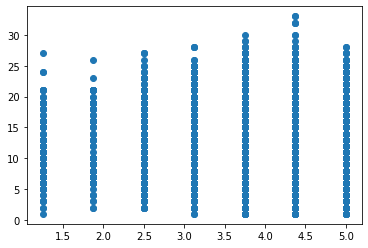

In [15]:
plt.scatter(y, X.n_words)
plt.show()

# y on X-axis, x.n_words on y-axis: no clear relationship between n-words "complexity" and ratings in plot

In [16]:
pd.crosstab(X.n_words, y)

# y on X-axis, x.n_words on y-axis: no clear relationship between n-words "complexity" and ratings in crosstab.
# Looks like there's just more higher rated recipes in general?

rating,1.250,1.875,2.500,3.125,3.750,4.375,5.000
n_words,,,,,,,
1.0,1,0,0,2,7,7,6
2.0,2,2,5,6,24,16,35
3.0,5,2,8,7,21,43,37
4.0,2,3,10,23,72,78,80
5.0,7,1,11,44,158,213,82
6.0,12,11,31,78,267,378,123
7.0,12,11,26,111,387,506,159
8.0,12,13,50,151,436,705,168
9.0,14,12,42,123,473,634,168


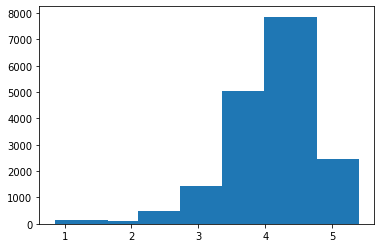

In [17]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

# Most reviews are 4 or above

3-ingredient recipes: Check if missing vals, etc.

In [18]:
print(X["3-ingredient recipes"].value_counts())
X.loc[X["3-ingredient recipes"].isna()]

# Not many 3-ingredient recipes: only 14 of almost 20k
# No missing values to fill in

0.0    17582
1.0       14
Name: 3-ingredient recipes, dtype: int64


,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_words


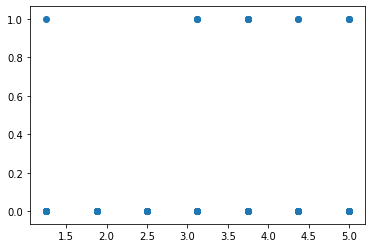

In [19]:
plt.scatter(y, X["3-ingredient recipes"])
plt.show()

# No clear relationship 

In [20]:
pd.crosstab(X["3-ingredient recipes"], y)

rating,1.250,1.875,2.500,3.125,3.750,4.375,5.000
3-ingredient recipes,,,,,,,
0.0,147,120,499,1449,5033,7862,2472
1.0,1,0,0,3,5,2,3


holidays: Dummy if a common/US holiday

In [21]:
# Get full list of X columns
X_cols = [col for col in X.columns]
X_cols

['title',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broc

In [22]:
holidays = ["bastille day", "christmas", "christmas eve", "cinco de mayo", "columbus", 
 "diwali", "easter", "father's day", "fourth of july", "friendsgiving", "halloween",
 "hanukkah", "kwanzaa", "labor day", "lunar new year", "mother's day", "new year's day",
 "new year's eve", "oktoberfest", "passover", "persian new year", "purim", "ramadan", 
 "rosh hashanah/yom kippur", "st. patrick's day", "sukkot", "thanksgiving", 
 "valentine's day"]

X["holiday"] = np.where(X[holidays].sum(axis=1)>0, 1, 0)

In [23]:
X.holiday.value_counts()

0    13999
1     3597
Name: holiday, dtype: int64

In [24]:
X.loc[X.holiday.isna()]

# No NAs in holiday

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_words,holiday


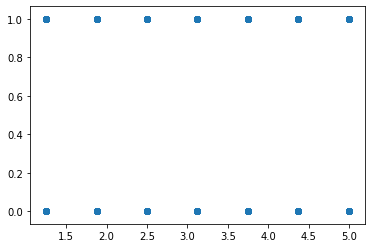

rating,1.250,1.875,2.500,3.125,3.750,4.375,5.000
holiday,,,,,,,
0,132,100,432,1212,4213,6094,1816
1,16,20,67,240,825,1770,659


In [25]:
plt.scatter(y, X.holiday)
plt.show()

pd.crosstab(X.holiday, y)

# Doesn't look like clear relationship between holiday and rating

In [27]:
X.shape

(17596, 681)

In [38]:
#FAT CLEANING
#checking nulls: over 20% (3.4k records)
fat_nulls=X.loc[(X.fat.isna())]
fat_nulls.shape[0]/X.shape[0]

0.0

In [ ]:
from sklearn.impute import SimpleImputer

#FAT: In grams but it can mislead depending of the number of portions (Paella for example)

#Delete bigger portions(Paella) and outliers
X=X.loc[((X.fat>=0) & (X.fat<=200)) | (X.fat.isna())]

#Median imputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
fat_clean = imp.fit_transform(X.fat.values.reshape(-1,1))
fat_clean = pd.DataFrame(data=fat_clean ,columns=['fat_clean'])
X['fat']=fat_clean.fat_clean.values

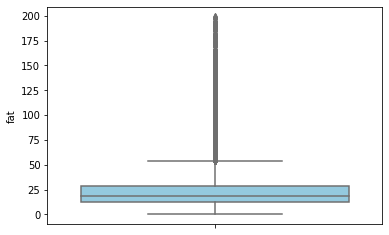

In [37]:
import seaborn as sns
sns.boxplot(y='fat',data=X, color="skyblue")

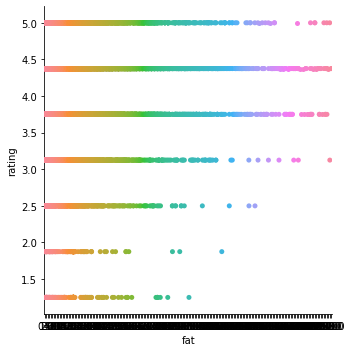

In [39]:
#Rating seems to have a strong relationship with fat values
sns.catplot(x="fat", y="rating", data=pd.concat([X,y], axis=1));

In [42]:
#Checking nulls again
fat_nulls=X.loc[(X.fat.isna())]
fat_nulls.shape[0]/X.shape[0]

0.0

In [43]:
#PROTEIN CLEANING

#checking nulls: over 20% (3.4k records)
nulls=X.loc[(X.protein.isna())]
nulls.shape[0]/X.shape[0]


0.19948394495412844

In [44]:
#Again, considering values lower than 200: deleting 62 rows...
X=X.loc[((X.protein>=0) & (X.protein<=200)) | (X.protein.isna())]

#Median imputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
protein_clean = imp.fit_transform(X.protein.values.reshape(-1,1))
protein_clean = pd.DataFrame(data=protein_clean ,columns=['protein_clean'])
X['protein']=protein_clean.protein_clean.values


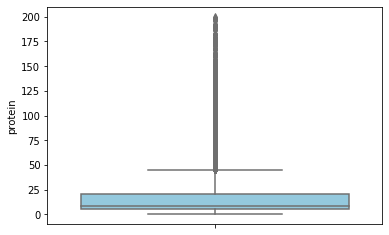

In [46]:
sns.boxplot(y='protein',data=X, color="skyblue")

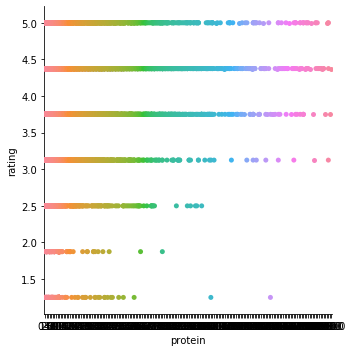

In [48]:
sns.catplot(x="protein", y="rating",  data=pd.concat([X,y], axis=1))

In [50]:
X.shape

(17378, 681)

In [51]:
# SODIUM

#checking nulls: over 20% (3.4k records)
nulls=X.loc[(X.sodium.isna())]
nulls.shape[0]/X.shape[0]

0.19950512141788468

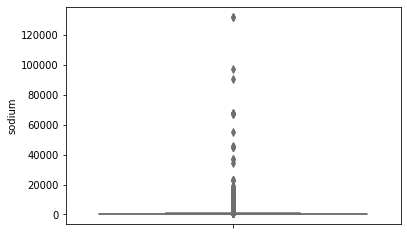

In [52]:
#Unit: miligrams
#Very different values, so we will impute only:

imp = SimpleImputer(missing_values=np.nan, strategy='median')
sodium_clean = imp.fit_transform(X.sodium.values.reshape(-1,1))
sodium_clean = pd.DataFrame(data=sodium_clean ,columns=['sodium_clean'])
X['sodium']=sodium_clean.sodium_clean.values


sns.boxplot(y='sodium',data=X, color="skyblue")

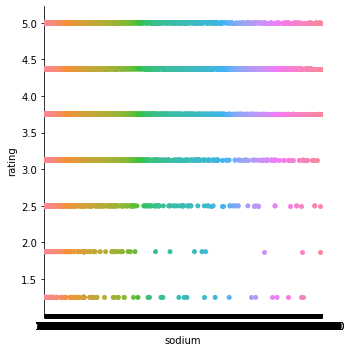

In [53]:
sns.catplot(x="sodium", y="rating", data=pd.concat([X,y], axis=1))

In [54]:
## 22-MINUTE
#checking nulls: There are no null values
nulls=X.loc[(X["22-minute meals"].isna())]
nulls.shape[0]/X.shape[0]


0.0

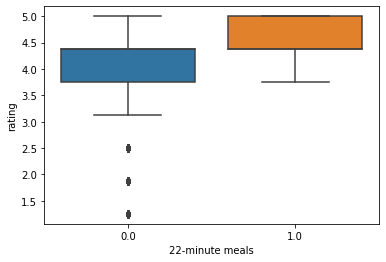

In [55]:
#String relationship between cooking time and rating!
sns.boxplot(x="22-minute meals", y="rating",  data=pd.concat([X,y], axis=1))

In [56]:
X.shape

(17378, 681)

In [7]:
# filtering columns related to "healthy"

for col in X.columns:
    if "low" in col:
        print(col)
    if "fat" in col:
        print(col)
    if "healt" in col:
        print(col)

fat
cauliflower
fat free
father's day
halloween
healthy
low cal
low carb
low cholesterol
low fat
low fat
low sodium
low sugar
low/no sugar
marshmallow
quick and healthy
slow cooker
yellow squash


In [8]:
# selecting all the relevant columns

selected = ["fat free", "healthy", "low cal", "quick and healthy", 
"low carb",
"low cholesterol",
"low fat",
"low sodium",
"low sugar",
"low/no sugar"]

In [9]:
data_pd = X

In [10]:
# filtering rows which have "selected" columns as 1 -> healthy
data_pd["allhealthy"] = 0
for col in selected:
    data_pd.loc[data_pd[col] == 1, "allhealthy"] = 1

In [11]:
# checking if there are any na values
for col in selected:
    if ~data_pd[col].isna().any():
        print(col)

fat free
healthy
low cal
quick and healthy
low carb
low cholesterol
low fat
low sodium
low sugar
low/no sugar


In [12]:
# checking out calories

if data_pd["calories"].isna().any():
    print(data_pd.loc[data_pd["calories"].isna()].agg({"title":"count", "allhealthy": "sum", "low cal": "sum"}))
    

title         3465.0
allhealthy    1518.0
low cal        456.0
dtype: float64


In [13]:
# chekcing types of the columns

for col in selected:
    print(f"{col}: {data_pd[col].dtype}")

fat free: float64
healthy: float64
low cal: float64
quick and healthy: float64
low carb: float64
low cholesterol: float64
low fat: float64
low sodium: float64
low sugar: float64
low/no sugar: float64


In [14]:
data_pd.loc[(data_pd["calories"].isna()) & (data_pd["allhealthy"] == 0)]

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,allhealthy
7,Spicy-Sweet Kumquats,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11,Spicy Noodle Soup,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,Pancetta and Taleggio Lasagna with Treviso,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31,Moroccan-Style Preserved Lemons,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
43,Purple-Potato and Crab Gratin,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,Ice Cream Sundaes with Chocolate-Coffee Sauce,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19987,Phyllo Pizza with Smoked Mozzarella and Cherry...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19998,Muffuletta Hot Dogs,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20012,Pepperoni Spaghetti Cakes,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
# replacing missing values in calories by mean

median = data_pd["calories"].median()
data_pd.loc[data_pd["calories"].isna(), "calories"] = median

In [16]:
# again checking out calories

if data_pd["calories"].isna().any():
    print(data_pd.loc[data_pd["calories"].isna()].agg({"title":"count", "allhealthy": "sum", "low cal": "sum"}))

In [17]:
# EDA
import matplotlib.pyplot as plt

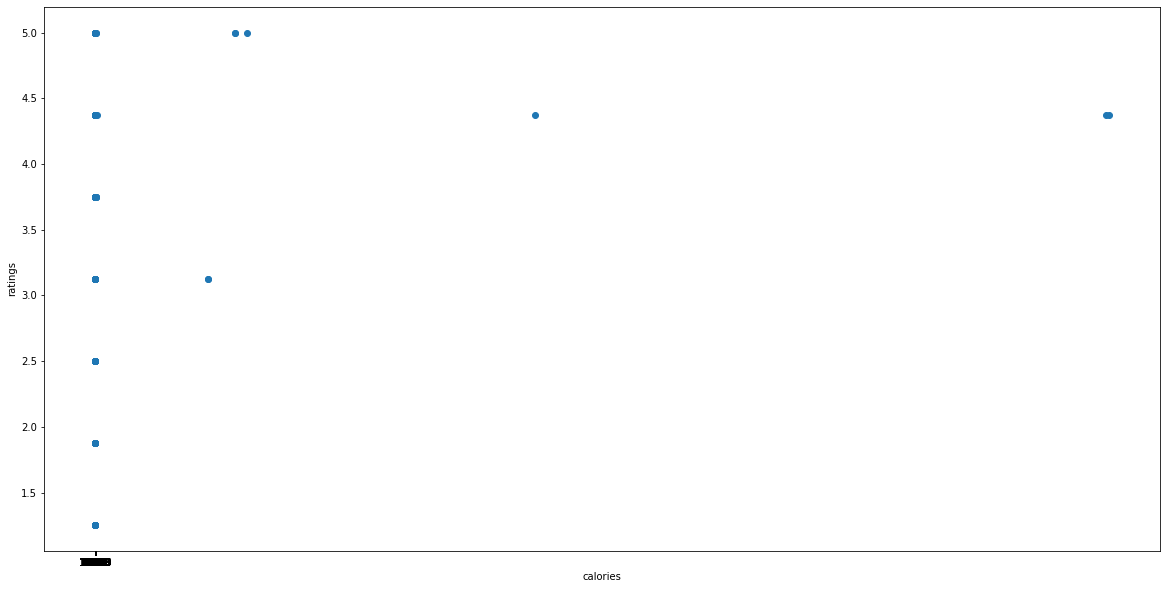

In [19]:
# plotting calories against ratings
x = data_pd["calories"]
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 20051, 5))
plt.scatter(x, y)
plt.xlabel('calories')
plt.ylabel('ratings')
#fig.tight_layout()
plt.show()

In [20]:
# checking out calories = 0

data_pd.loc[data_pd["calories"] == 0]

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,allhealthy
285,Salted Water for Boiling,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4848,To Clarify Butter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6089,Dashi (Japanese Sea Stock),0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8492,To Clarify Butter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9259,Spritz Wreaths,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10741,Salted Water for Boiling,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12805,Dashi (Japanese Sea Stock),0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13059,Salted Water for Boiling,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
# checking type of rating
data_pd["calories"].dtype
data_pd[["calories"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17596 entries, 0 to 20051
Data columns (total 1 columns):
calories    17596 non-null float64
dtypes: float64(1)
memory usage: 274.9 KB


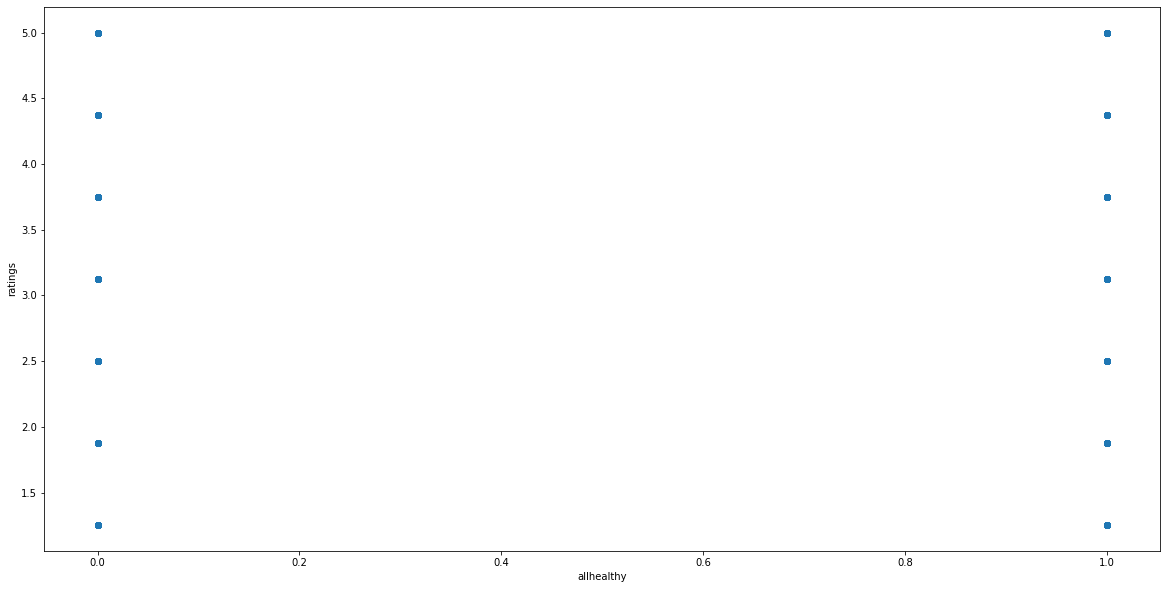

In [23]:
# plotting ratings against allhealthy variable

x = data_pd["allhealthy"]
plt.figure(figsize=(20,10))
#plt.xticks(np.arange(0, 20051, 5))
plt.scatter(x, y)
plt.xlabel('allhealthy')
plt.ylabel('ratings')
#fig.tight_layout()
plt.show()


In [24]:
X = data_pd